### 과제 Quiz 1.

#### Quiz 1.
- text9에서 lexical diversity 계산하기
- text6에서 중복없는 셋 내림차순 정렬하기
    - a. 앞에서 단어 10개 추출하기
    - b. 조건문 연습: 'z'가 있으면 대문자로 바꾸기, 'z'가 없는데 4자 이상이면 끝 글자 대문자로 바꾸기

In [1]:
from nltk import book

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
#lexical diversity 계산
nine = book.text9
len(set(nine.tokens)) / len(nine.tokens)

0.0983485761345412

#### Quiz 2.
- 주민등록번호, 휴대폰 번호, 이메일 입력받는다.
    - 주민번호, 휴대폰번호는 숫자만 입력 (- 없이)
    - 이메일은 아이디만 입력(@뒷부분 없음)
- 출력:
    - "당신은 {}년 {}월 {}일 출생의 {남성/여성}입니다."
    - 휴대폰번호: {} #하이픈으로 연결하기
    - 이메일주소:{아이디}@gmail.com

In [76]:
rrn = input('주민등록 번호를 입력하시오.(-없이 숫자만 입력) ') #int 로 받지 않음
phone_number = input('휴대폰 번호를 입력하시오.(-없이 숫자만 입력) ')
e_mail = input('이메일을 입력하시오.(@뒷부분 없이 아이디만 입력) ')
                   
year = rrn[:2]
birth_month = rrn[2:4]
birth_day = rrn[4:6]
gender = rrn[6]


# 연도 구분을 하긴 했었는데 수업 중간에 설명하신 분의 예시가 좀 더 간결하고 분류하기 좋아서 참고해서 고침

if gender == '1' or gender == '2':
    century = '19'+year
    if gender == '1':
        seong = '남성'
    else :
        seong = '여성'
elif gender == '3' or gender == '4':
    century = '20'+ year
    if gender == '3':
        seong = '남성'
    else:
        seong = '여성'
        
        
        
print(f'당신은 {century}년 {birth_month}월 {birth_day}일 출생의 {seong}입니다.')        
print(f'{phone_number[:3]}',f'{phone_number[3:7]}',f'{phone_number[7:]}',sep='-')
print(f'{e_mail}@gmail.com')

주민등록 번호를 입력하시오.(-없이 숫자만 입력)  342342334
휴대폰 번호를 입력하시오.(-없이 숫자만 입력)  3423584359
이메일을 입력하시오.(@뒷부분 없이 아이디만 입력)  gadi


당신은 2034년 23월 42일 출생의 남성입니다.
342-3584-359
gadi@gmail.com


### 함수 Ⅰ
- `y = 3x + 1`
- `<str>`.fx(<요소>)
- count(): 텍스트에서 어떤 요소의 개수를 세는 함수
- replace(): A -> B
- strip() : 불필요한 공백 등 원하는 요소를 제거하는 역할
- find() : 원하는 문자열 찾기
- index() : 원하는 문자열의 인덱스를 반환해줌

In [12]:
#count() 원하는 단어의 개수 세기
moby = book.text1
moby.count('the') #대소문자 구분을 하기때문에 The나 THE는 찾지 않음

13721

In [13]:
moby.count('THE')

98

In [14]:
book.text2.count('the')

3861

In [16]:
#replace(A,B) 단어의 위치 바꾸기
word = 'the'
word = word.replace('t','T')

In [17]:
word

'The'

In [27]:
# strip(), lstrip(), rstrip() 원하는 요소를 제거해줌
word = '            \t word'
print(word.lstrip())
print(word.strip())
print(word.rstrip())

word
word
            	 word


In [26]:
snow = 'sssssssssSnowsssssss'
print(snow.lstrip('s'))
print(snow.rstrip('s'))
print(snow.strip('s'))

Snowsssssss
sssssssssSnow
Snow


In [29]:
word = '            \t word'
word.lstrip().replace('w','W').replace('d','k') #연속적으로 스트링에 붙일 수 있음

'Work'

In [40]:
# find() : 원하는 문자열 찾음
word2 = 'I have a pen.'
word2.find('a') #첫번째 문자를 반환 / 동일하게 lfind 와 rfind 존재

3

In [41]:
print(word2.rfind('a'))
print(word2.find('a'))

7
3


In [43]:
word2.index('a')

3

In [47]:
# index 랑 find 둘 다 문자 위치를 반환해주지만 없는 문자열을 넣을 때가 다름
# index는 오류 반환, find는 -1을 반환

word2.find('k')

-1

In [46]:
word2.index('k')

ValueError: substring not found

### 함수 Ⅱ
- NLTK 전용 # 텍스트 속성을 알아보는 함수가 많음
- concordance(): 특정 스트링이 어떤 문맥에서 쓰이는지
- similar(): 주어진 스트링과 비슷한 문맥에서 쓰이는 단어를 보여줌
- common_context([리스트]) : 주어진 스트링들이 공유하는 문맥
- dispersion_plot([리스트]) : 주어진 스트링들이 텍스트의 어느 위치에 나오는지 이미지로 보여줌

In [48]:
moby = book.text1
moby.concordance('whale')

Displaying 25 of 1226 matches:
s , and to teach them by what name a whale - fish is to be called in our tongue
t which is not true ." -- HACKLUYT " WHALE . ... Sw . and Dan . HVAL . This ani
ulted ." -- WEBSTER ' S DICTIONARY " WHALE . ... It is more immediately from th
ISH . WAL , DUTCH . HWAL , SWEDISH . WHALE , ICELANDIC . WHALE , ENGLISH . BALE
HWAL , SWEDISH . WHALE , ICELANDIC . WHALE , ENGLISH . BALEINE , FRENCH . BALLE
least , take the higgledy - piggledy whale statements , however authentic , in 
 dreadful gulf of this monster ' s ( whale ' s ) mouth , are immediately lost a
 patient Job ." -- RABELAIS . " This whale ' s liver was two cartloads ." -- ST
 Touching that monstrous bulk of the whale or ork we have received nothing cert
 of oil will be extracted out of one whale ." -- IBID . " HISTORY OF LIFE AND D
ise ." -- KING HENRY . " Very like a whale ." -- HAMLET . " Which to secure , n
restless paine , Like as the wounded whale to shore flies thro ' the maine ." -
. OF SPER

In [50]:
moby.similar('whale')

ship boat sea time captain world man deck pequod other whales air
water head crew line thing side way body


In [51]:
type(moby.similar('whale')) #타입이 논타입이라서 변수로 받아쓸 수 없음

ship boat sea time captain world man deck pequod other whales air
water head crew line thing side way body


NoneType

In [52]:
sense = book.text2

In [55]:
sense.concordance('girl')

Displaying 25 of 36 matches:
, had not the entreaty of her eldest girl induced her first to reflect on the 
s a good - humored , well - disposed girl ; but as she had already imbibed a g
rowing attachment between her eldest girl and the brother of Mrs . John Dashwo
 be unaffected was all that a pretty girl could want to make her mind as capti
 get a good husband for every pretty girl . The immediate advantage to herself
 praise , she was called a beautiful girl , truth was less violently outraged 
ere going to be married . Ungracious girl ! But I require no such proof . Noth
 " I should hardly call her a lively girl -- she is very earnest , very eager 
have always set her down as a lively girl ." " I have frequently detected myse
r , you shall see a monstrous pretty girl ." He immediately went into the pass
ur sister . She is a monstrous lucky girl to get him , upon my honour ; not bu
 added , tenderly caressing a little girl of three years old , who had not mad
ome working candles ? M

In [56]:
sense.similar('girl')

place man person mother pleasure way time cold mind marianne valued
subject carriage look face letter family of . estate


In [57]:
sense.common_contexts(['girl']) #리스트로 작성

poor_, eldest_induced disposed_; eldest_and pretty_could pretty_.
beautiful_, ungracious_! lively_-- lively_." pretty_." lucky_to
little_of little_would pretty_so stylish_they pretty_, richer_is
a_miss healthful_,


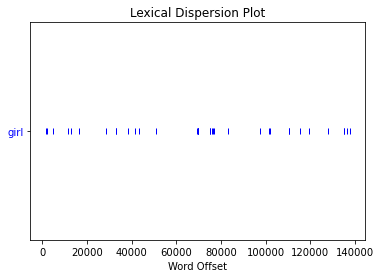

In [59]:
sense.dispersion_plot(['girl']) #리스트로 작성

In [53]:
sense.common_contexts(['monstrous','very'])

am_glad a_pretty a_lucky is_pretty be_glad


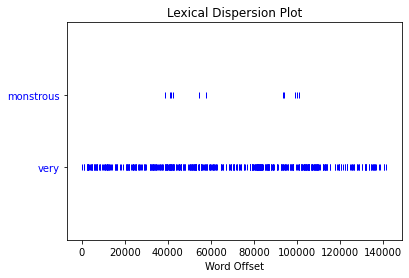

In [54]:
sense.dispersion_plot(['monstrous','very'])

### 리스트 & 리스트컴프리헨션
- 프로그래밍에서 '배열'에 해당, 파이썬에서는 `리스트`라고 부른다.
- 하나의 변수에 여러 값을 할당하는 자료형
    - example = [1,2,3,4]
- 대괄호를 사용한다
- 내부 요소들의 자료형은 꼭 같지 않아도 된다
    - example = [1, 'very', True]
- 순서가 있는 자료형 => 슬라이싱, 인덱싱 가능함
- 빈 리스트 선언: set, []

In [60]:
empty = []

In [63]:
colors = ['blue','yellow','white']
colors[0]
#colors[02]는 안됨

'blue'

In [65]:
print(colors[-1])
print(colors[::-1]) #뒤집어서 출력

white
['white', 'yellow', 'blue']


In [69]:
first = 'ein'
ex = [1, 'one', first]
ex

[1, 'one', 'ein']

In [72]:
print(ex[0])
print(ex[-1])
print(ex[::-1])

print(type(ex))

1
ein
['ein', 'one', 1]
<class 'list'>


#### List comprehension
- 포함형 / 지능형 / 축약형 리스트
- 하나의 리스트에서 그걸 포함하여 다른 리스트를 만든다.
- list + for loop
- [A for A' in C]
    - C에 있는 B에서 A를 가져와라 => 리스트에 담아서 반환
    - A: 내가 원하는 출력형태
    - A': C의 형태를 구현
    - C: 반복가능한 자료형 (주로 리스트)
- 조건 추가: [A for A' in C if]

In [73]:
colors = ['blue','yellow','white']

[color for color in colors]

['blue', 'yellow', 'white']

In [77]:
[color[0] for color in colors] #각각 돌면서 0번째 인덱스만 반환

['b', 'y', 'w']

In [78]:
colors.index('blue')

0

In [79]:
#text1의 토큰 중 처음 10개 단어에서 마지막 알파벳만 반환하기
moby = book.text1
[moby.tokens]

[['[',
  'Moby',
  'Dick',
  'by',
  'Herman',
  'Melville',
  '1851',
  ']',
  'ETYMOLOGY',
  '.',
  '(',
  'Supplied',
  'by',
  'a',
  'Late',
  'Consumptive',
  'Usher',
  'to',
  'a',
  'Grammar',
  'School',
  ')',
  'The',
  'pale',
  'Usher',
  '--',
  'threadbare',
  'in',
  'coat',
  ',',
  'heart',
  ',',
  'body',
  ',',
  'and',
  'brain',
  ';',
  'I',
  'see',
  'him',
  'now',
  '.',
  'He',
  'was',
  'ever',
  'dusting',
  'his',
  'old',
  'lexicons',
  'and',
  'grammars',
  ',',
  'with',
  'a',
  'queer',
  'handkerchief',
  ',',
  'mockingly',
  'embellished',
  'with',
  'all',
  'the',
  'gay',
  'flags',
  'of',
  'all',
  'the',
  'known',
  'nations',
  'of',
  'the',
  'world',
  '.',
  'He',
  'loved',
  'to',
  'dust',
  'his',
  'old',
  'grammars',
  ';',
  'it',
  'somehow',
  'mildly',
  'reminded',
  'him',
  'of',
  'his',
  'mortality',
  '.',
  '"',
  'While',
  'you',
  'take',
  'in',
  'hand',
  'to',
  'school',
  'others',
  ',',
  'and',
  '

##### [moby.tokens][:10] 까지만 생각하고 이후로 손을 대지 못함

In [83]:
[last[-1] for last in moby[:10]] #단어 10개 중에서 마지막 알파벳

['[', 'y', 'k', 'y', 'n', 'e', '1', ']', 'Y', '.']

In [84]:
[last[-1] for last in moby][:10] #마지막 알파벳 중에서 10개

['[', 'y', 'k', 'y', 'n', 'e', '1', ']', 'Y', '.']

###### 10개의 단어 중에 3보다 작은 단어 추출

In [86]:
[word for word in moby[:10] if len(word) < 3]

['[', 'by', ']', '.']

###### 3보다 작고 .만 있는 단어 추출

In [87]:
[word for word in moby[:10] if (len(word) < 3) and (word == '.')]

['.']

##### mini Quiz. text5에서 길이가 15 이상인 단어 추출하기

In [10]:
chat = book.text5
[word for word in chat if len(word) >= 15]

NameError: name 'book' is not defined

##### mini Quiz 2. text3에서 대문자인 단어를 소문자로 변환하기: isupper(), lower()

In [93]:
print('hey'.isupper())
print('Her'.isupper())
print('H'.isupper())

False
False
True


##### genesis = book.text3
[word.lower() for word in genesis if genesis[:].isupper() == True]
라고 생각했는데 아니네,,

In [100]:
[word.lower() for word in genesis if word.isupper()]

['i',
 'i',
 'lord',
 'lord',
 'lord',
 'lord',
 'lord',
 'lord',
 'lord',
 'lord',
 'i',
 'lord',
 'lord',
 'lord',
 'lord',
 'lord',
 'lord',
 'lord',
 'i',
 'i',
 'i',
 'i',
 'i',
 'i',
 'lord',
 'i',
 'lord',
 'i',
 'i',
 'i',
 'lord',
 'lord',
 'lord',
 'i',
 'lord',
 'lord',
 'lord',
 'lord',
 'lord',
 'i',
 'i',
 'lord',
 'i',
 'i',
 'i',
 'lord',
 'lord',
 'lord',
 'i',
 'lord',
 'lord',
 'lord',
 'lord',
 'lord',
 'i',
 'i',
 'i',
 'lord',
 'i',
 'a',
 'i',
 'i',
 'i',
 'lord',
 'i',
 'i',
 'i',
 'i',
 'lord',
 'lord',
 'lord',
 'lord',
 'lord',
 'i',
 'i',
 'i',
 'i',
 'i',
 'i',
 'i',
 'i',
 'i',
 'i',
 'i',
 'i',
 'i',
 'i',
 'i',
 'i',
 'i',
 'lord',
 'lord',
 'lord',
 'lord',
 'lord',
 'lord',
 'lord',
 'lord',
 'lord',
 'i',
 'i',
 'i',
 'i',
 'lord',
 'lord',
 'i',
 'lord',
 'lord',
 'lord',
 'i',
 'i',
 'lord',
 'i',
 'lord',
 'i',
 'i',
 'i',
 'i',
 'lord',
 'lord',
 'lord',
 'lord',
 'i',
 'i',
 'i',
 'lord',
 'i',
 'lord',
 'i',
 'i',
 'i',
 'lord',
 'i',
 'lord',
 

#### cased, uncased
- 변환: `upper(), lower(), title(), swapcase()`  
- 형태 체크 : `isupper(), islower(), istitle()`
    - `endswith(<string>), strartswith(), starswith()`
    - `isalpha()`: 문자냐

In [101]:
# text1에서 'ableness'로 끝나는 단어를 중복없이, 정렬해서
# 어떤 요소를 포함하면서 list -> list

In [103]:
sorted(set([word for word in moby if word.endswith('ableness')]))

['comfortableness',
 'honourableness',
 'immutableness',
 'indispensableness',
 'indomitableness',
 'intolerableness',
 'palpableness',
 'reasonableness',
 'uncomfortableness']

In [104]:
[w for w in moby if w.endswith('ableness')]

['uncomfortableness',
 'comfortableness',
 'intolerableness',
 'immutableness',
 'indomitableness',
 'reasonableness',
 'indispensableness',
 'indomitableness',
 'honourableness',
 'palpableness']

In [106]:
set([w for w in moby if w.endswith('ableness')])

{'comfortableness',
 'honourableness',
 'immutableness',
 'indispensableness',
 'indomitableness',
 'intolerableness',
 'palpableness',
 'reasonableness',
 'uncomfortableness'}

In [ ]:
# text4에서 'gnt'가 포함된 단어들을 소문자로 리스트 변환
adress = book.text4
set([word.lower() for word in adress if 'gnt' in adress])

In [ ]:
[w.lower for w in set(adress) if 'gnt' in word] #중복을 없애고 연산, 대소문자구분이 되어있는 상태에서 중복을 없애서 America 와 america 같이 남음
set([w.lower for w in adress if 'gnt' in word]) 

###### 노트북이 느려서 실행되지 않음
###### a = [word.lower() for word in set(text4) if 'gnt' in word]
###### b = set([word.lower() for word in text4 if 'gnt' in word])

len(a), len(b)
- (3, 2)

### NLTK - Frequency Distribution
- 단어가 몇 번 출현했는지 (빈도 수)
- 텍스트의 성질을 알기 위해
    - 단어 개수
    - 단어 빈도수

In [113]:
from nltk.probability import FreqDist
fdist = FreqDist(book.text1)

In [114]:
moby = book.text1
from nltk import FreqDist
fdist = FreqDist(moby)

In [115]:
fdist.most_common(10)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982)]

In [116]:
fdist['that'], moby.count('that')

(2982, 2982)

In [117]:
fdist.freq('that')

0.011433216138394826

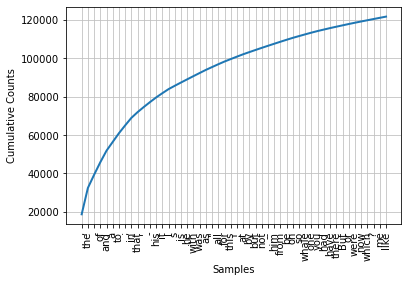

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [118]:
fdist.plot(50, cumulative = True)

In [119]:
# 가장 빈번하지 않은 => 1번 나타나는 단어들
    # 알파벳만 리스트에 담아보기, 중복없이
len(fdist.hapaxes())

9002

In [123]:
# [word for word in fdist.hapaxes() if word.isalpha()]

In [124]:
# !pip install matplotlib

In [125]:
#대소문자 구분없이 freq dist 제작? the 15,000 The 600 => the 21,000
    # 리스트 -> 리스트
    #set -> 중복 없앰 -> 빈도 수 == 1

In [126]:
# 이러면 안됨 fdist_set = set(FreqDist(moby))

In [127]:
fdist2 = FreqDist([w.lower() for w in moby])
fdist2['the'] #소문자로 변환해준 fdist2

14431

In [129]:
fdist['The']

612

In [131]:
fdist2['The'] #소문자로 변환해준 이후라 The는 인식되지 않음

0

In [132]:
fdist = FreqDist(moby) # 대소문자, 첫글자 대문자 the, The, THE
fdist2 = FreqDist([word.lower() for word in moby]) #한꺼번에 세어질 수 있도록

In [133]:
# text2에서 길이가 3자 이하이고, 빈도수가 5이상

In [137]:
sense = book.text2
fdist_sense = FreqDist([word for word in sense if len(word) <= 3 and sense.count(word) <= 5])

In [139]:
#fdist_sense = FreqDist (한줄로 출력하기)
[word for (word,count) in FreqDist(sense).items()\
    if (len(word)<= 3) and (count >= 5)]

['and',
 'by',
 'The',
 'of',
 'had',
 'in',
 '.',
 'was',
 ',',
 'at',
 'the',
 'for',
 'so',
 'a',
 'as',
 'to',
 'man',
 'who',
 'age',
 'his',
 'But',
 'her',
 'ten',
 'own',
 ';',
 'he',
 'Mr',
 'it',
 'In',
 'old',
 "'",
 's',
 'His',
 'all',
 'Mrs',
 'not',
 'but',
 'him',
 'By',
 'one',
 'son',
 ':',
 'on',
 'To',
 'be',
 '-',
 'He',
 'nor',
 ';--',
 'or',
 'way',
 'no',
 'any',
 'its',
 'up',
 'far',
 'are',
 'two',
 'an',
 'lay',
 'sum',
 'law',
 'do',
 'how',
 'ill',
 'is',
 'Had',
 ':--',
 '.--',
 '"',
 'Yes',
 '!',
 'It',
 'day',
 'did',
 'No',
 'HER',
 'she',
 'act',
 'So',
 'led',
 'She',
 'yet',
 'saw',
 'now',
 'too',
 'As',
 'A',
 'boy',
 'How',
 '?',
 'And',
 'why',
 'my',
 'me',
 ',"',
 'I',
 '."',
 'say',
 'you',
 'if',
 'new',
 'can',
 'If',
 'our',
 '--"',
 'Why',
 'may',
 '!"',
 'Oh',
 '--',
 '!--',
 'One',
 'we',
 'My',
 'An',
 'You',
 'out',
 'Her',
 'has',
 'am',
 'NOT',
 'end',
 'Do',
 'pay',
 '?--',
 'YOU',
 'ONE',
 'set',
 'owe',
 'For',
 'see',
 'get',
 '

### 리스트 <-> 스트링
- split(): string.split(separator)
    - default = ' '
- join() : seperator.join(string)

In [5]:
sent = 'I have a car'
#['I','have','a','car'] #tokens
sent.split(',').strip() #strip 은 string에서 쓰는 함수라 안됨

AttributeError: 'list' object has no attribute 'strip'

In [142]:
# solution
[word.strip() for word in sent.split(',')]

['I have a car']

In [6]:
' '.join(sent)
sent_tokens = [word.strip() for word in sent.split(',')]

In [7]:
' '.join(sent_tokens)

'I have a car'

### 반복문 맛보기
- 자료구조를 순회할 때 사용
- 시작조건, 종료조건, 수행명령

- for 변수 in <반복 범위>:
  <들여쓰기> <수행명령>
  [<수행명령> for 변수 in <반복범위>]
- range(start, end, stop): 숫자 순회할 때
    - 0부터 시작
    - 인덱스랑 다른 점은 :-> ,

In [8]:
[w for w in sent_tokens]

['I have a car']

In [9]:
for w in sent_tokens:
    print(w)

I have a car


In [4]:
#1에서 10까지 출력하고 싶다
for i in range(1,11):
    print(i)

1
2
3
4
5
6
7
8
9
10


### Ex
- 1. text 6에서 길이가 4자 이하인 알파벳 중 ie를 포함하는 단어를 단어 개수로 출력하시오.
    - 예: [1, 3, 4, 3]
    
- 2. text2에서 ch로 끝나는 단어를 출력하는데
    - 중복 없고
    - 첫글자와 ch 남기고 가운데는 모두 -으로 가려라.
        예: much -> m-ch
        m.......ch 면 그 수만큼 -으로 가려야됨
        - ch로 시작하면 바꾸면 안됨
    - 정렬:
        - 문자 길이로 정렬하기

In [12]:
from nltk import book
monty = book.text6
from nltk.probability import FreqDist
fdist = FreqDist(monty)

[count for (word, count) in FreqDist(monty).items()
    if len(word) <= 4 and 'ie' in word]

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


[2, 10, 4, 2, 1, 1, 3]